In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans#

import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_excel("Unit6-Portfolio-Task-Data.xlsx")

### Data Preprocessing

In [40]:
df.head()

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
0,0,739,13,12,M,Single,23,Own,Unskilled,Low
1,0,1230,25,0,M,Divorced,32,Own,Skilled,High
2,0,389,19,119,M,Single,38,Own,Management,High
3,638,347,13,14,M,Single,36,Own,Unskilled,High
4,963,4754,40,45,M,Single,31,Rent,Skilled,Low


In [41]:
df.isna().sum()

Current Account    0
Savings Account    0
Months Customer    0
Months Employed    0
Gender             0
Marital Status     0
Age                0
Housing            0
Job                0
Credit Risk        0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Current Account  425 non-null    int64 
 1   Savings Account  425 non-null    int64 
 2   Months Customer  425 non-null    int64 
 3   Months Employed  425 non-null    int64 
 4   Gender           425 non-null    object
 5   Marital Status   425 non-null    object
 6   Age              425 non-null    int64 
 7   Housing          425 non-null    object
 8   Job              425 non-null    object
 9   Credit Risk      425 non-null    object
dtypes: int64(5), object(5)
memory usage: 33.3+ KB


In [54]:
df.describe()

,Current Account,Savings Account,Months Customer,Months Employed,Age
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,1048.014118,1812.562353,22.896471,31.896471,34.397647
std,3147.183472,3597.285020,12.267599,32.259321,11.045126
min,0.000000,0.000000,5.000000,0.000000,18.000000
25%,0.000000,228.000000,13.000000,6.000000,26.000000
50%,0.000000,596.000000,19.000000,20.000000,32.000000
75%,560.000000,921.000000,28.000000,47.000000,41.000000
max,19812.000000,19811.000000,73.000000,119.000000,73.000000


In [43]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

In [44]:
df["Marital Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [45]:
df["Housing"].unique()

array(['Own', 'Rent', 'Other'], dtype=object)

In [46]:
df["Job"].unique()

array(['Unskilled', 'Skilled', 'Management', 'Unemployed'], dtype=object)

In [47]:
df["Credit Risk"].unique()

array(['Low', 'High'], dtype=object)

### Data Analysis

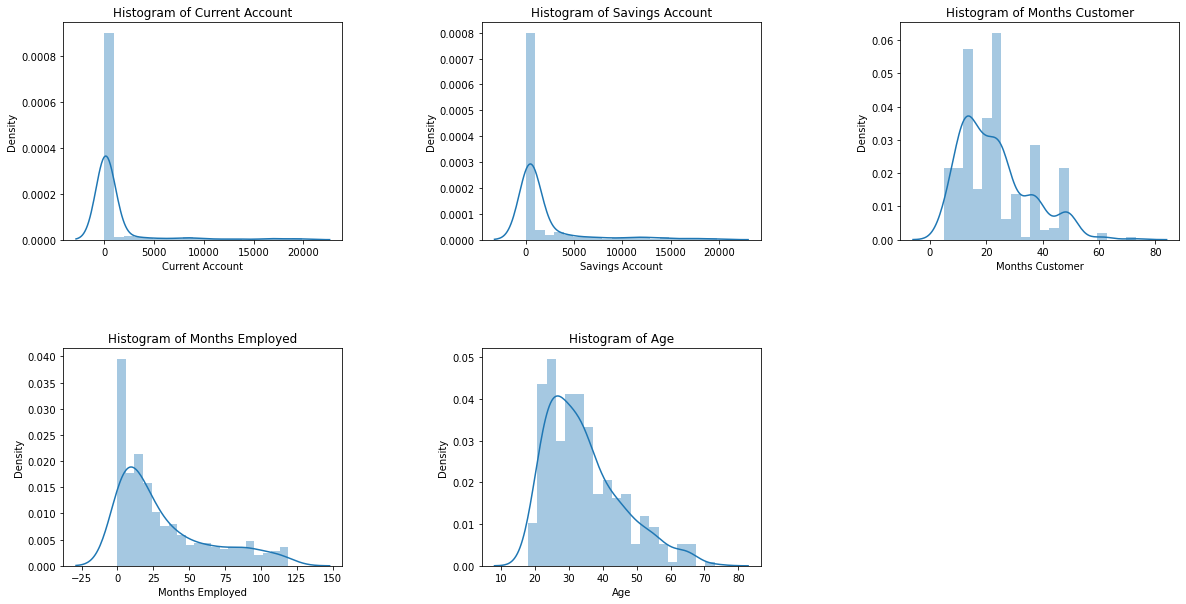

In [48]:
plt.figure(1, figsize=(20,10))
n=0
for x in ["Current Account","Savings Account","Months Customer","Months Employed","Age"]:
    n += 1 
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Histogram of {}".format(x))
plt.show()

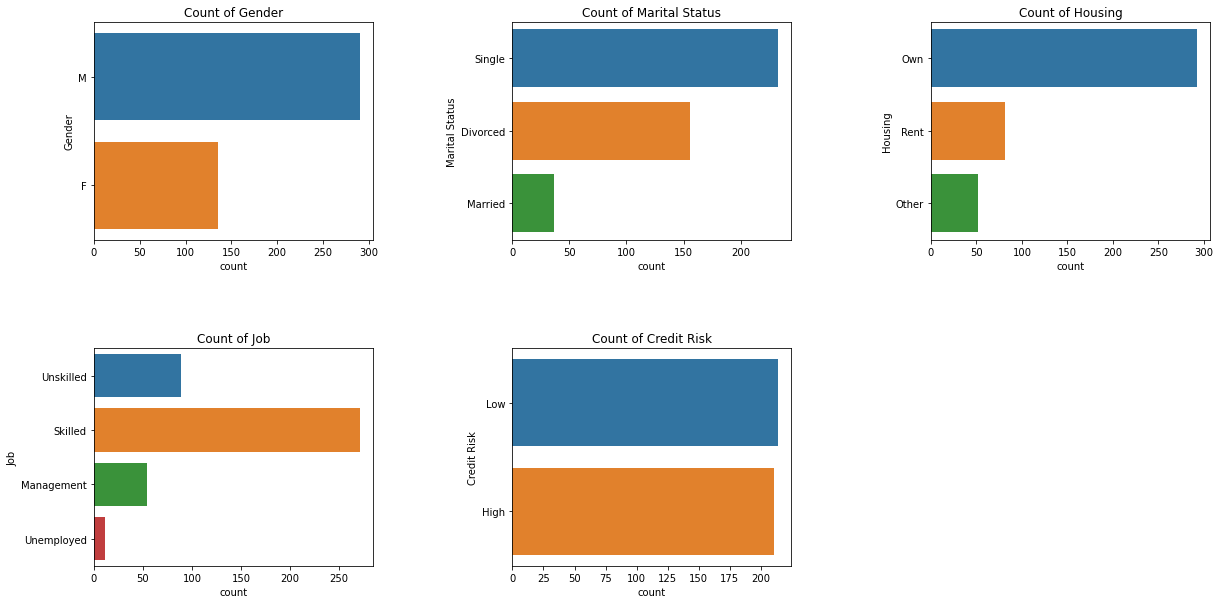

In [49]:
plt.figure(1, figsize=(20,10))
n=0
for x in ["Gender","Marital Status","Housing","Job","Credit Risk"]:
    n += 1 
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.countplot(y=x, data=df)
    plt.title("Count of {}".format(x))
plt.show()

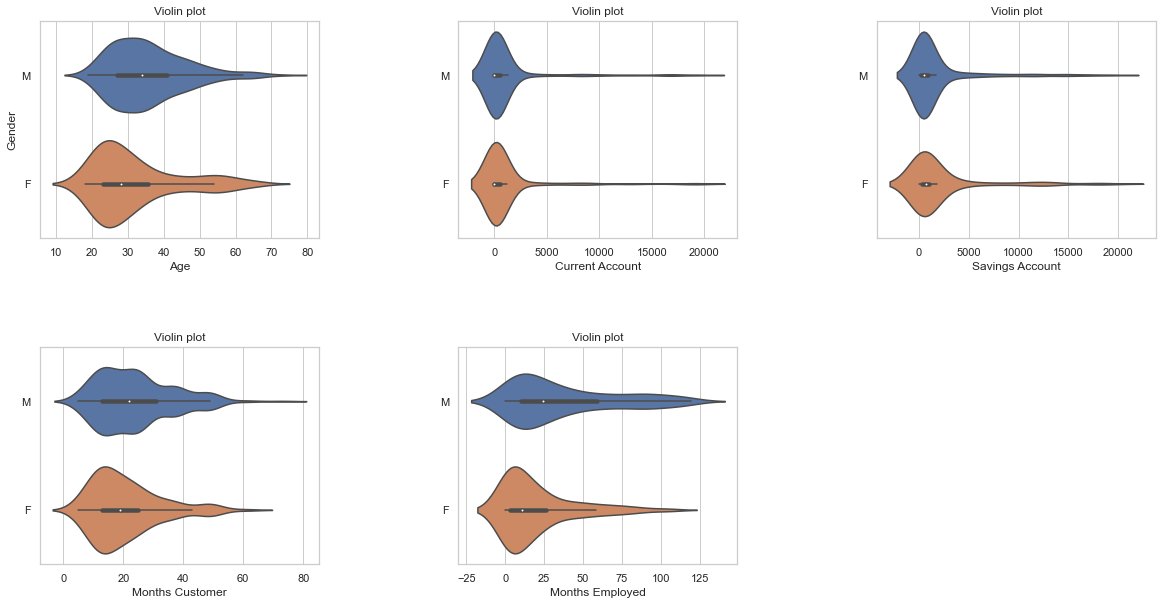

In [53]:
plt.figure(1, figsize=(20,10))
n=0
for cols in ["Age","Current Account","Savings Account","Months Customer","Months Employed"]:
    n += 1 
    plt.subplot(2,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x = cols, y="Gender", data=df)
    plt.ylabel("Gender" if n == 1 else "")
    plt.title("Violin plot")
plt.show()

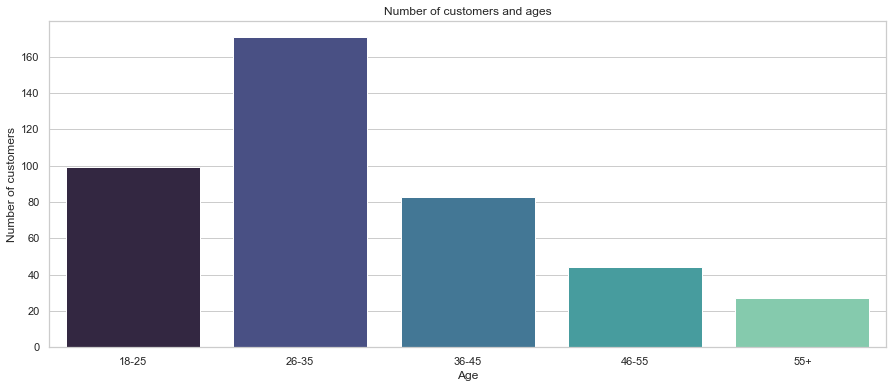

In [57]:
age_18_25 = df.Age[(df.Age >= 19) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age > 55)]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey,palette="mako")
plt.title("Number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()